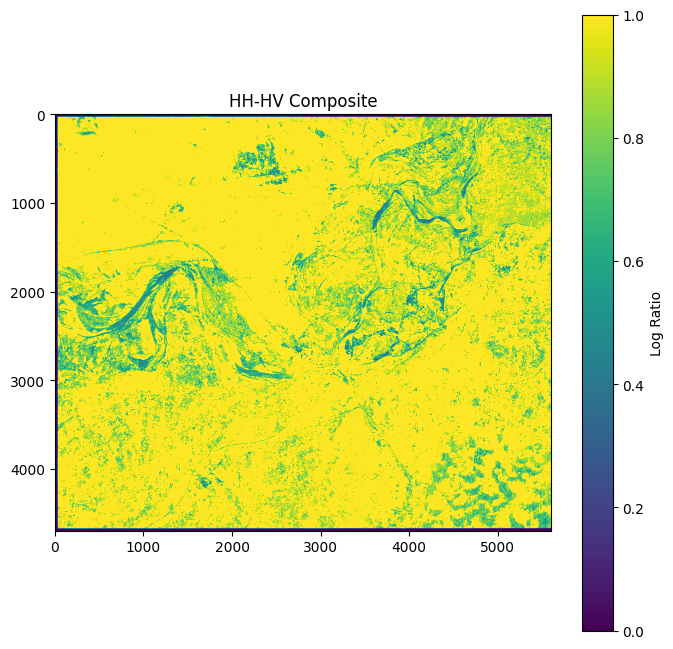

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

hh_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HV-ALPSRP245160540-H2.2_UA.tif"

with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)
    hv_data = hv_dataset.read(1)

epsilon = 1e-8
combined_data = np.log(hh_data + epsilon) - np.log(hv_data + epsilon)

plt.figure(figsize=(8, 8))

plt.imshow(combined_data, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label="Log Ratio")
plt.title("HH-HV Composite")

plt.show()


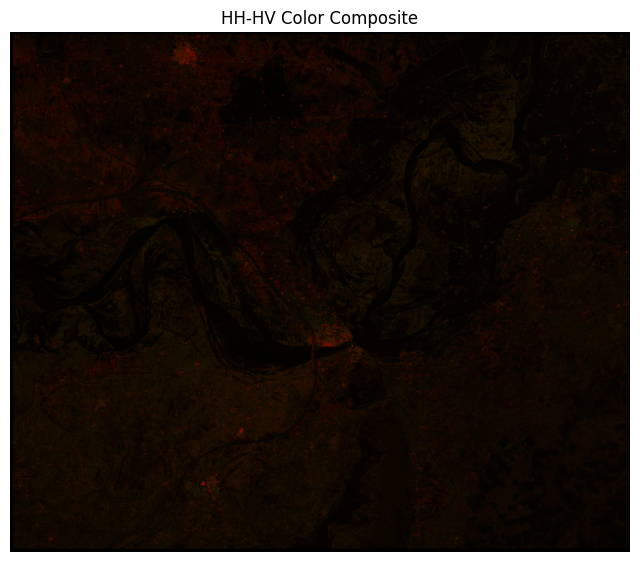

In [3]:
#Normalized Method
import rasterio
import numpy as np
import matplotlib.pyplot as plt

hh_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HV-ALPSRP245160540-H2.2_UA.tif"

with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)
    hv_data = hv_dataset.read(1) 
hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))

rgb_image = np.zeros((hh_data.shape[0], hv_data.shape[1], 3), dtype=np.float32)
rgb_image[:, :, 0] = hh_normalized 
rgb_image[:, :, 1] = hv_normalized 

rgb_image = np.clip(rgb_image, 0, 1)
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("HH-HV Color Composite")
plt.axis('off')  
plt.show()

colormap = plt.get_cmap("viridis")

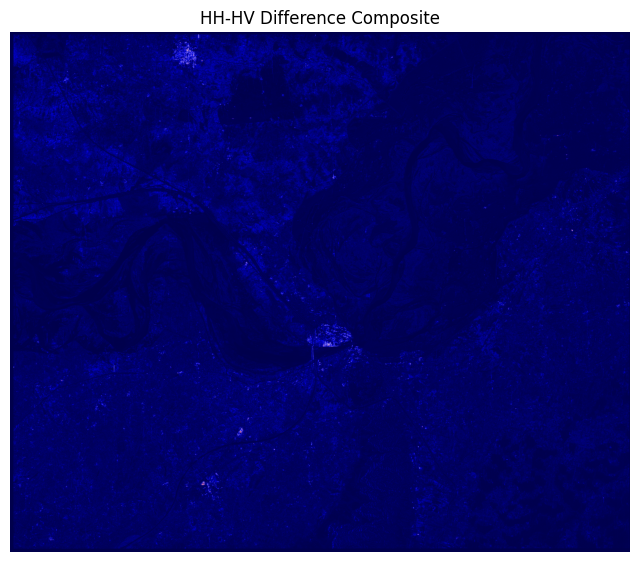

In [4]:
#Normalized (Seismic)
import rasterio
import numpy as np
import matplotlib.pyplot as plt

hh_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "C:\\Users\\User\\Documents\\DIGITAL IMAGE PROCESSING\\AP_PanoAqil_AUG2010\\HV-ALPSRP245160540-H2.2_UA.tif"

with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1) 
    hv_data = hv_dataset.read(1) 

hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))

difference = hh_normalized - hv_normalized

colormap = plt.get_cmap("seismic") 

difference_colormap = (colormap(difference)[:, :, :3] * 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(difference_colormap)
plt.title("HH-HV Difference Composite")
plt.axis('off') 

plt.show()